In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Mall_Customers.xls')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


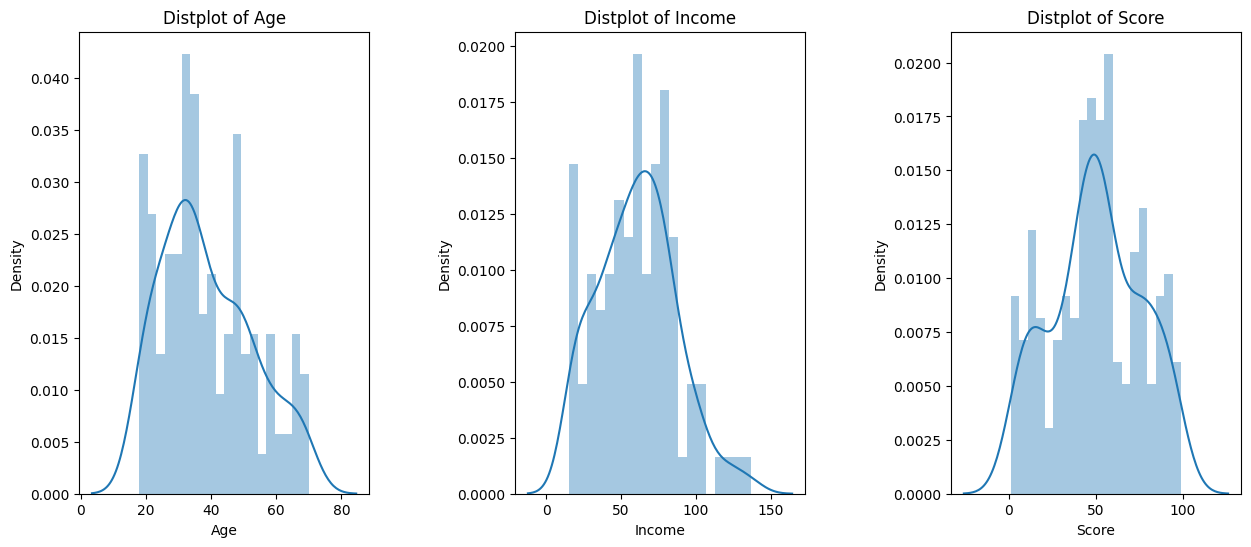

In [11]:
plt.figure(1, figsize = (15, 6))
n = 0

for x in ['Age', 'Income', 'Score']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

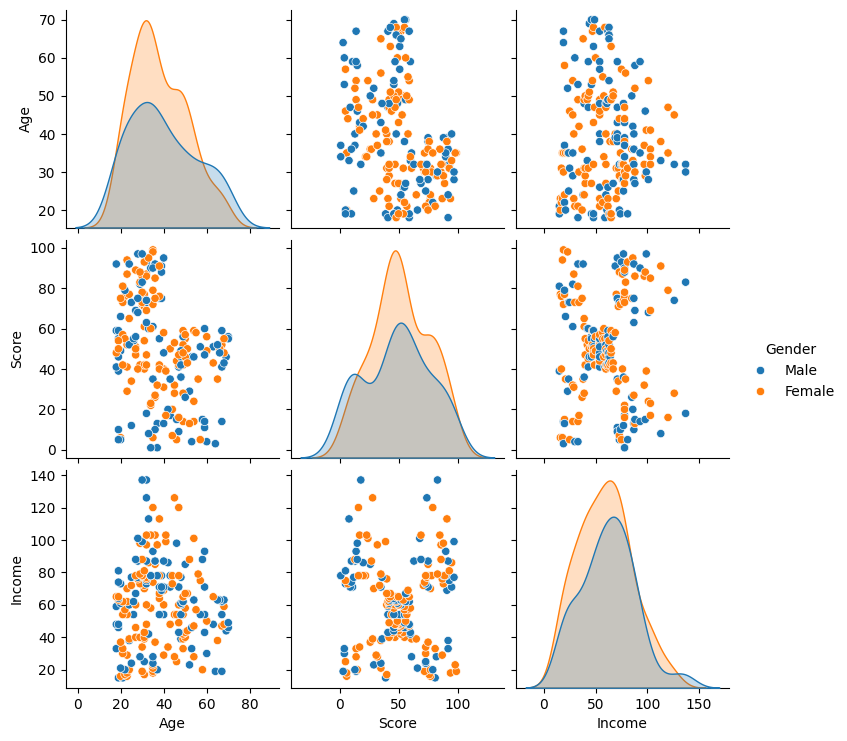

In [12]:
sns.pairplot(df, vars = ['Age', 'Score', 'Income'], hue = 'Gender')
plt.show()

In [13]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

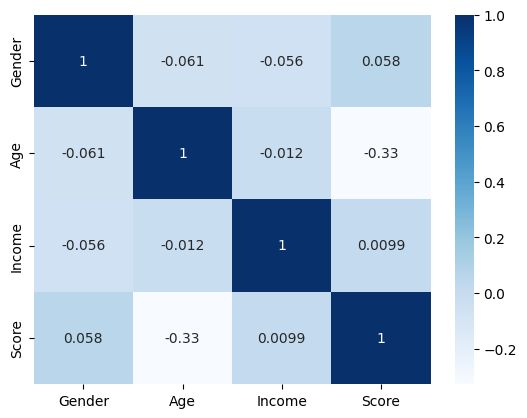

In [14]:
sns.heatmap(df.drop(columns = 'CustomerID').corr(), annot = True, cmap = 'Blues')
plt.show()

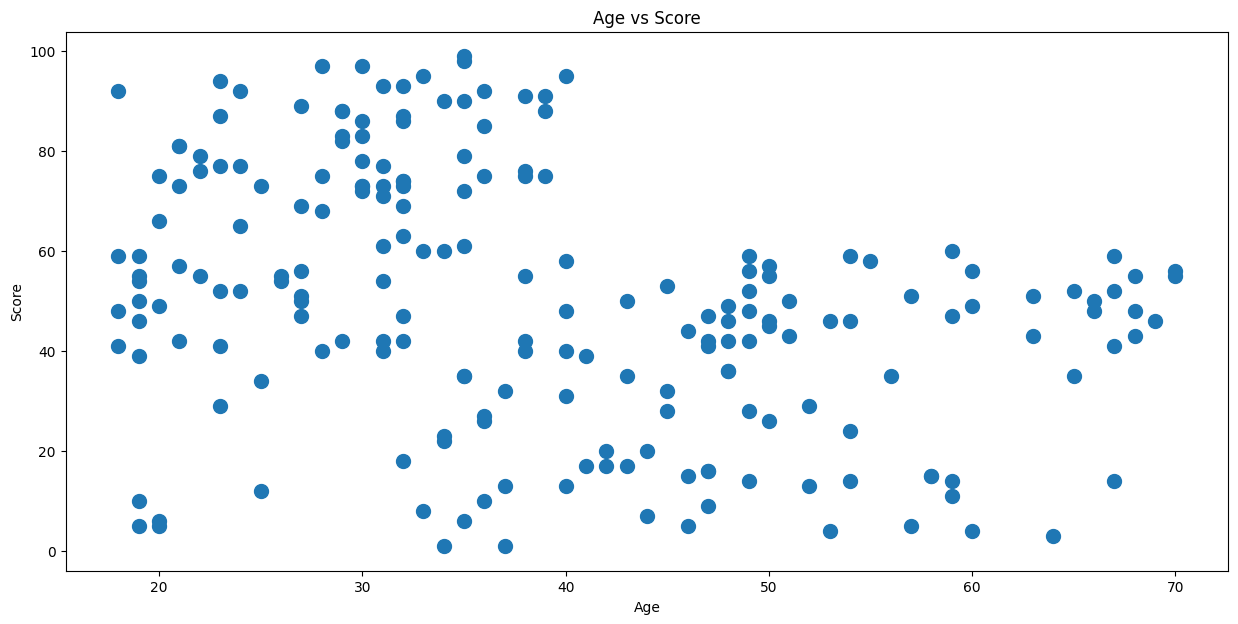

In [15]:
plt.figure(1, figsize = (15, 7))
plt.scatter(x = 'Age', y = 'Score', data = df, s = 100)
plt.title('Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

In [16]:
### Deciding K value

In [17]:
X1 = df.loc[:, ['Age', 'Score']].values

inertia = []

for n in range(1,15):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

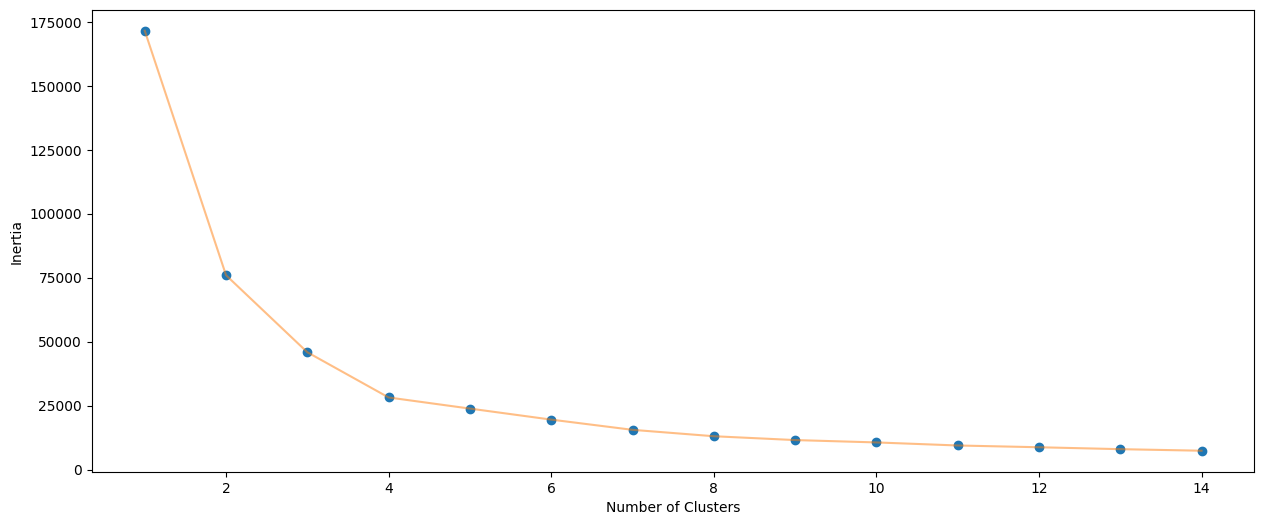

In [18]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# k = 4 clusters

In [20]:
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

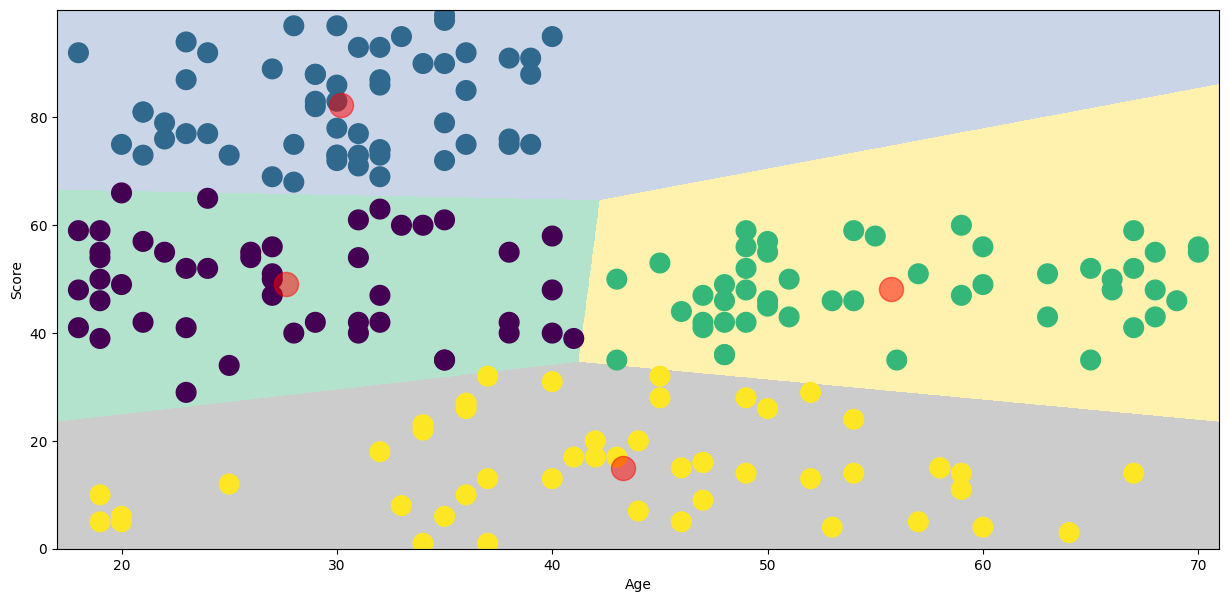

In [22]:
plt.figure(1, figsize = (15, 7))
plt.clf()

plt.imshow(Z.reshape(xx.shape),
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Score', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Score')
plt.xlabel('Age')
plt.show()

In [23]:
### k =5 clustere

In [24]:
algorithm = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [25]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

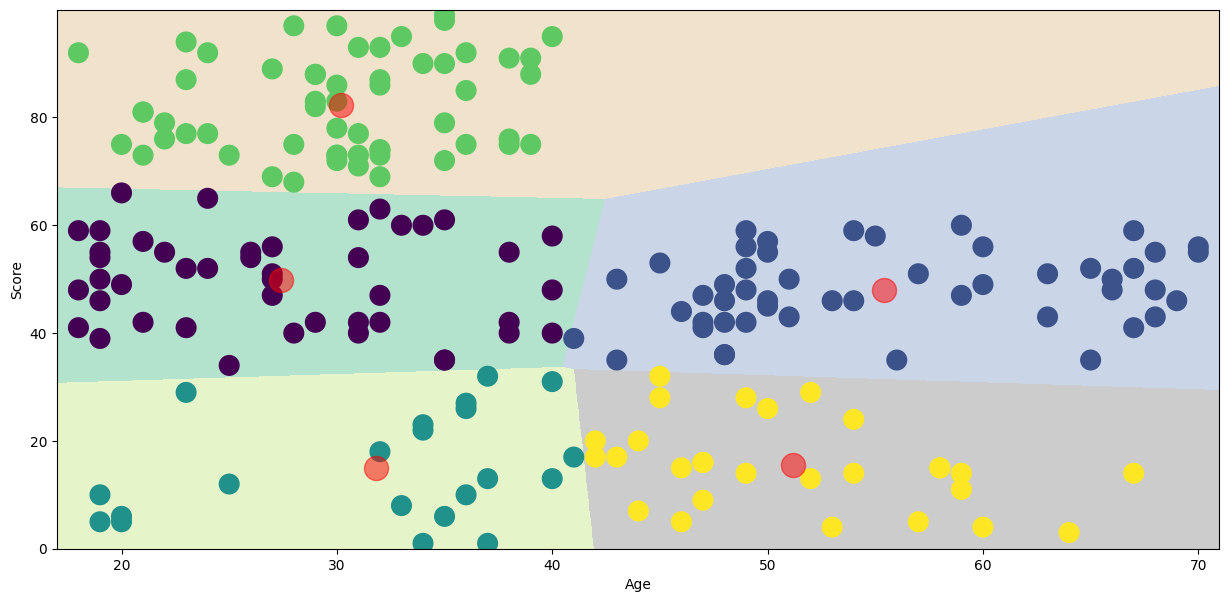

In [26]:
plt.figure(1, figsize = (15, 7))
plt.clf()

plt.imshow(Z.reshape(xx.shape),
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Score', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Score')
plt.xlabel('Age')
plt.show()

In [28]:
X2 = df[['Income', 'Score']].values

inertia = []

for n in range(1,15):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

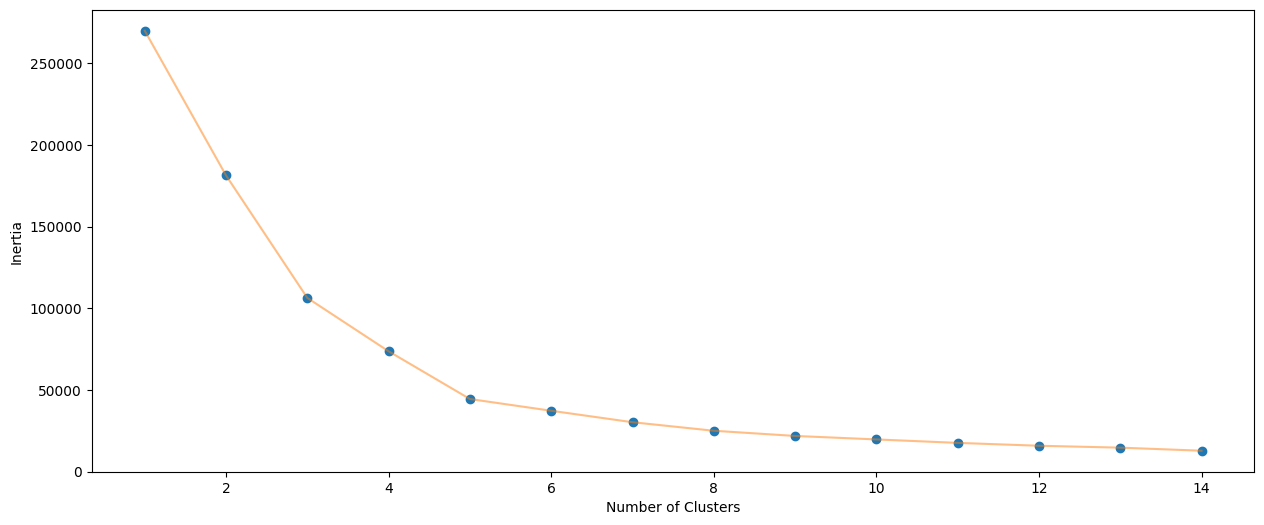

In [29]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
algorithm = (KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [32]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

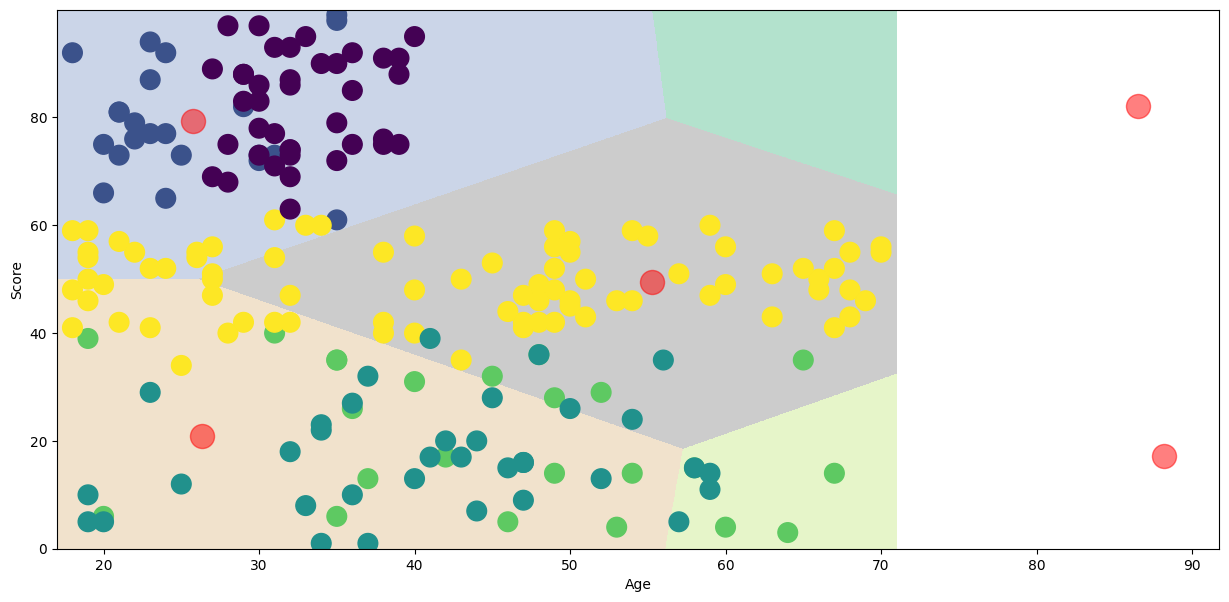

In [33]:
plt.figure(1, figsize = (15, 7))
plt.clf()

plt.imshow(Z.reshape(xx.shape),
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin = 'lower')

plt.scatter(x = 'Age', y = 'Score', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.ylabel('Score')
plt.xlabel('Age')
plt.show()

In [35]:
X3 = df[['Age', 'Income', 'Score']].values

inertia = []

for n in range(1,15):
  algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
  algorithm.fit(X3)
  inertia.append(algorithm.inertia_)

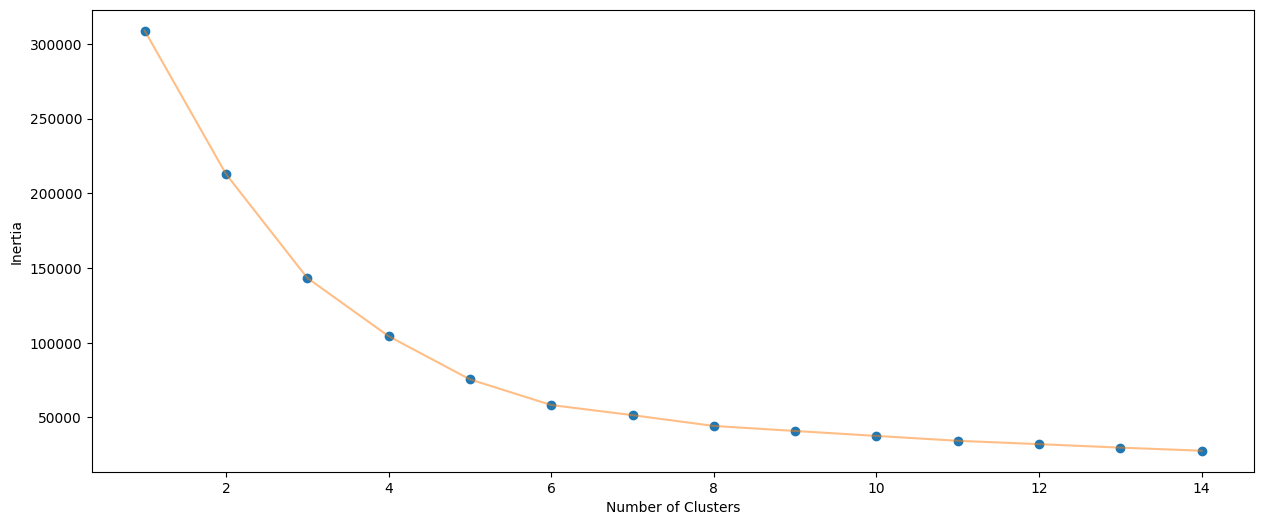

In [36]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 15), inertia, 'o')
plt.plot(np.arange(1, 15), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [39]:
algorithm = (KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, max_iter = 300,
                      tol = 0.0001, algorithm = 'elkan', random_state = 111))
algorithm.fit(X3)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [40]:
y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)

df.head()

,CustomerID,Gender,Age,Income,Score,cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,5
2,3,1,20,16,6,4
3,4,1,23,16,77,5
4,5,1,31,17,40,4


In [41]:
trace1 = go.Scatter3d(
    x = df['Age'],
    y = df['Income'],
    z = df['Score'],
    mode = 'markers',
    marker = dict(
        color = df['cluster'],
        size = 10,
        line = dict(
            color = df['cluster'],
            width = 12
        ),
        opacity = 0.8
    )
)

data = [trace1]

layout = go.Layout(
title = 'Clusters',
scene = dict(
    xaxis = dict(title = 'Age'),
    yaxis = dict(title = 'Income'),
    zaxis = dict(title = 'Score')
)
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [43]:
### Hierachical Clustering (Agglomerative Clustering)

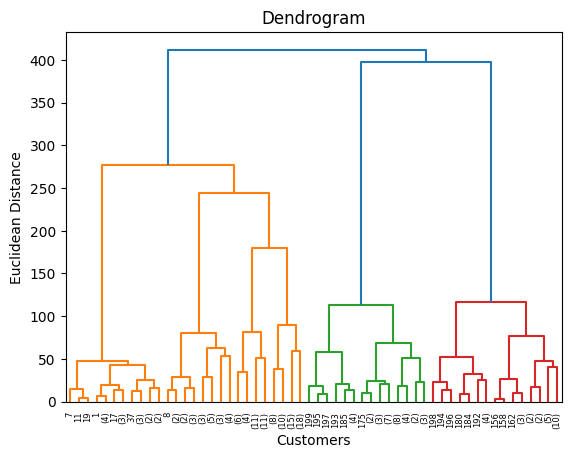

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X3, method = 'ward')

plt.figure()
dendrogram(Z, truncate_mode = 'level', p = 5)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [53]:
n_clusters = 5

agg = AgglomerativeClustering(n_clusters = n_clusters, linkage = 'ward')
agg_labels = agg.fit_predict(X3)
print({i:int((agg_labels ==i).sum()) for i in np.unique(agg_labels)})

{np.int64(0): 83, np.int64(1): 35, np.int64(2): 39, np.int64(3): 20, np.int64(4): 23}


In [55]:
X3_df = pd.DataFrame(X3, columns = ['Age', 'Income', 'Score'])
X3_df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [56]:
X3_df['cluster'] = agg_labels

In [57]:
agg_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [58]:
X3_df.head()

,Age,Income,Score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
